# Визуализация данных

## Задание 1

Найти и выгрузить многомерные данные с использованием библиотеки pandas. В отчёте описать найденные данные

In [19]:
import pandas as pd
df = pd.read_csv("data/corruption_data.csv")

## Задание 2

Вывести информацию о данных при помощи методов .info(), .head().

Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для дальнейшей работы с ними.

Выведем информацию о датасете:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   region_name  180 non-null    object
 1   2021         180 non-null    int64 
 2   2020         180 non-null    int64 
 3   2019         180 non-null    int64 
 4   2018         180 non-null    int64 
 5   2017         180 non-null    int64 
 6   2016         180 non-null    int64 
 7   2015         180 non-null    int64 
 8   2014         180 non-null    int64 
 9   2013         180 non-null    int64 
 10  2012         180 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 15.6+ KB


In [21]:
df.head(3)

,region_name,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
0,Denmark,88,88,87,88,88,90,91,92,91,90
1,New Zealand,88,88,87,87,89,90,91,91,91,90
2,Finland,88,85,86,85,85,89,90,89,89,90


Нулевых значений у нас нет, двигаемся дальше

In [22]:
df.isnull().sum()

region_name    0
2021           0
2020           0
2019           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
dtype: int64

Данных много, рассмотрим только те страны, где наблюдается высокий уровень коррупции по сравнению с другими.
Отсортируем по 2021 году (последнему), возьмем топ 20 стран по коррупции за последние три года.

In [23]:
new_df = df.sort_values(by='2021', ascending=True) # по возрастанию
new_df = new_df[:20]
new_df = new_df[new_df.columns.difference(new_df.keys()[4:11])]
new_df.head()

,2019,2020,2021,region_name
179,12,12,11,South Sudan
177,9,12,13,Somalia
178,13,14,13,Syria
176,16,15,14,Venezuela
175,15,15,16,Yemen


Индексирование сломалось, починим

In [24]:
new_df = new_df.reset_index(drop=True)
new_df.head()

,2019,2020,2021,region_name
0,12,12,11,South Sudan
1,9,12,13,Somalia
2,13,14,13,Syria
3,16,15,14,Venezuela
4,15,15,16,Yemen


Те, страны, что имеют показатели низкие - считаются более коррумпированными. Это неудобно, переведем в обратную шкалу.


In [25]:
for i in range(len(new_df['region_name'])):
    for key in new_df.keys():
            if key != 'region_name':
                new_df[key][i] = 100 - new_df[key][i]

C:\Users\orono\AppData\Local\Temp\ipykernel_13628\840658437.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Строим графики

## Задание 3

Построить столбчатую диаграмму (.bar) с использованием модуля graph_objs из библиотеки Plotly со следующими параметрами:
3.1. По оси Х указать дату или название, по оси У указать количественный показатель.
3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).
3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2.
3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.
3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.
3.6. Размер текста меток осей сделать равным 14.
3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.
3.8. Убрать лишние отступы по краям.


In [26]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.bar(new_df, x='region_name', y=new_df.keys()[0:3])
fig.update_traces(textfont_size=14, textangle=0, textposition='outside', marker=dict(coloraxis="coloraxis"), marker_line_width=2, marker_line_color="black")
fig.update_layout(title='Most corrupted countries in the world', title_font_size=20,
                  title_y=0.98, title_x=0.50,
                  title_xanchor='center', title_yanchor='top',
                  xaxis_title='Name of the country', xaxis_title_font_size=16, xaxis_tickfont_size=14,
                  yaxis_title='Value', yaxis_title_font_size=16, yaxis_tickfont_size=14, yaxis_tickangle=315,
                  width=None, height=700,
                  margin=dict(l = 0,r = 0,t = 40,b = 0),legend_title_text='Year')
fig.show()

## Задание 4

Построить круговую диаграмму (go.Pie), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2.

Все очень круто, но сначала подготовим данные для круговой визуализации. Индекс коррупции имеет диапазон от 0 до 100 (более/менее коррумпированная страна).
Посмотрим, как менялось количество стран по диапазонам маркера: (0:30], (30:60], (60;100). Посмотрим данные за 2020 и 2021.

In [27]:
years_stat = {'2020': {"small": 0,"medium": 0,"huge": 0}, '2021': {"small": 0,"medium": 0,"huge": 0}}
for i in range(len(df['2021'])):
    for name in ['2020', '2021']:
        if df[name][i] <= 30:
            years_stat[name]["small"] += 1
        elif df[name][i] <= 60:
            years_stat[name]["medium"] += 1
        else:
            years_stat[name]["huge"] += 1
years_stat

{'2020': {'small': 52, 'medium': 94, 'huge': 34},
 '2021': {'small': 53, 'medium': 92, 'huge': 35}}

In [28]:
labels = ['small', 'medium', 'huge']
fig_pie = px.pie(years_stat, values=years_stat['2020'], labels=labels)
fig_pie.update_traces(marker=dict(line=dict(color='black', width=2)), textinfo='percent+text', text=labels,
                      textfont_size=14)
fig_pie.update_layout(title='Countries with small, medium and huge level of corruption [2020 year]', title_font_size=20,
                      title_x = 0.50, title_y = 0.98,
                      title_xanchor='center', title_yanchor='top',
                      width=None, height=700,
                      margin=dict(l = 0,r = 0,t = 40,b = 0))
fig_pie.show()

In [29]:
fig_pie = px.pie(years_stat, values=years_stat['2021'])
fig_pie.update_traces(textfont_size=14, marker=dict(line=dict(color='black', width=2)), textinfo='percent+text', text=labels)
fig_pie.update_layout(title='Countries with small, medium and huge level of corruption [2021 year]', title_font_size=20,
                      title_x = 0.50, title_y = 0.98,
                      title_xanchor='center', title_yanchor='top',
                      width=None, height=700,
                      margin=dict(l = 0,r = 0,t = 40,b = 0))
fig_pie

## Задание 5

Построить линейный график накопленных значений количественного показателя.
5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет точек 'white', цвет границ точек 'black', толщина границ точек равна 2.
5.2. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory').

Посмотрим, как менялся уровень коррупции в Китае за все годы. Подготовим данные

In [30]:
values = dict()
for i in range(len(df['region_name'])):
    if "China" in df['region_name'][i]:
        for j in df.keys():
            if j != 'region_name':
                values[j] = 100-df[j][i]

In [31]:
values.values()

dict_values([55, 58, 59, 61, 59, 60, 63, 64, 60, 61])

Построим эту красоту

In [32]:
data = {'Year': list(values.keys()),
        'Value': list(values.values())}
china_df = pd.DataFrame(data)
china_df

,Year,Value
0,2021,55
1,2020,58
2,2019,59
3,2018,61
4,2017,59
5,2016,60
6,2015,63
7,2014,64
8,2013,60
9,2012,61


In [33]:
china_df=china_df.sort_values(by='Year').reset_index()

In [34]:
fig = go.Figure(px.line(x=china_df['Year'], y=china_df['Value'], markers=True))
fig.update_traces(textfont_size=14,
                  line_color='crimson',
                  marker_color='white', marker_line_color='black', marker_line_width=2)

fig.update_layout(title='Corruption level of China', title_font_size=20,
                  title_y=0.98, title_x=0.50,
                  title_xanchor='center', title_yanchor='top',
                  xaxis_title='Value', xaxis_title_font_size=16, xaxis_tickfont_size=14,
                  yaxis_title='Name of the country', yaxis_title_font_size=16, yaxis_tickfont_size=14, xaxis_tickangle=315,
                  width=None, height=700,
                  margin=dict(l = 0,r = 0,t = 40,b = 0),legend_title_text='Year')

fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.show()

## Задание 6

Постараться создать аналогичные графики с использованием библиотеки matplotlib.

### График самых коррумпированных стран

In [35]:
new_df.head()

,2019,2020,2021,region_name
0,88,88,89,South Sudan
1,91,88,87,Somalia
2,87,86,87,Syria
3,84,85,86,Venezuela
4,85,85,84,Yemen


In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = new_df['region_name']
y1 = new_df['2019']
y2 = new_df['2020']
y3 = new_df['2021']

for i in range(len(new_df['2020'])):
    new_df['2020'][i] += 100
    new_df['2021'][i] += 200

C:\Users\orono\AppData\Local\Temp\ipykernel_13628\3658441429.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\orono\AppData\Local\Temp\ipykernel_13628\3658441429.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



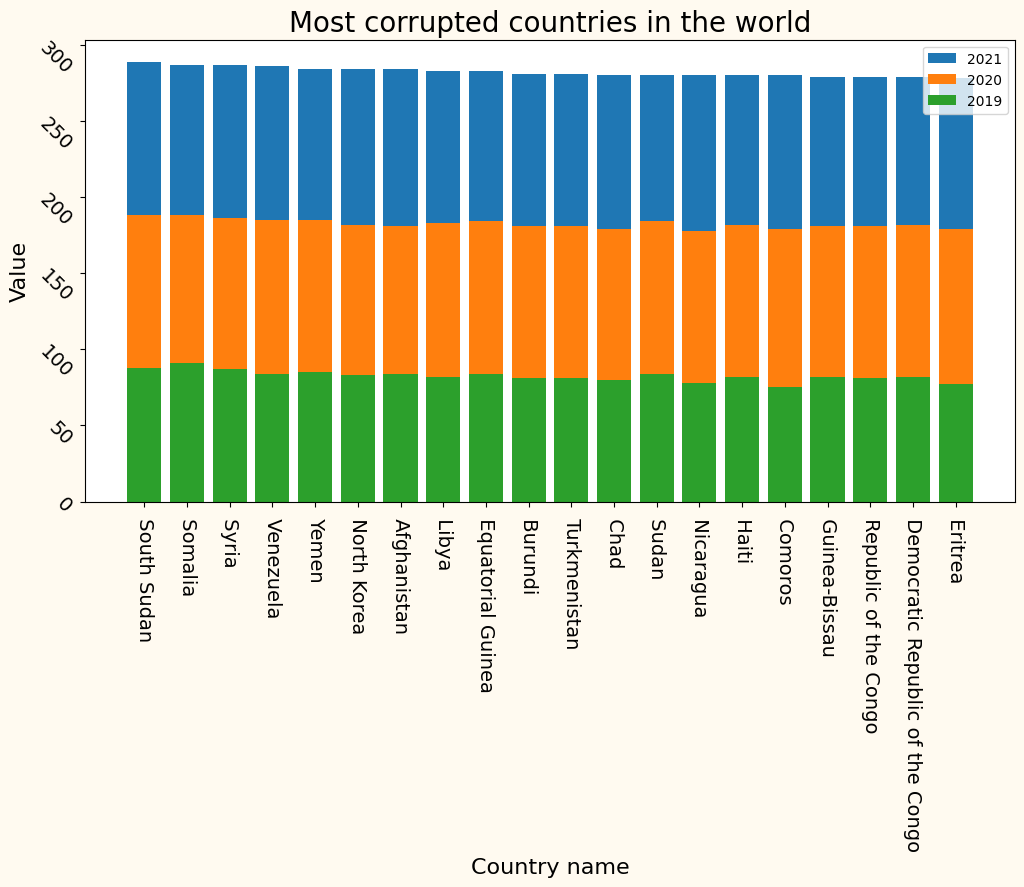

In [37]:
fig, ax = plt.subplots()

bar1 = ax.bar(x, y3, label='2021')
bar2 = ax.bar(x, y2, label='2020')
bar3 = ax.bar(x, y1, label='2019')
ax.legend(handles=[bar1, bar2, bar3])

fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.ylabel('Value', size=16)
plt.xlabel('Country name', size=16)
plt.title('Most corrupted countries in the world', size=20)
plt.yticks(rotation=315, size=14)
plt.xticks(size=14, rotation=270)
plt.show()

### График соотношения количества сильных, средних и слабых коррумпированных стран

In [38]:
years_stat

{'2020': {'small': 52, 'medium': 94, 'huge': 34},
 '2021': {'small': 53, 'medium': 92, 'huge': 35}}

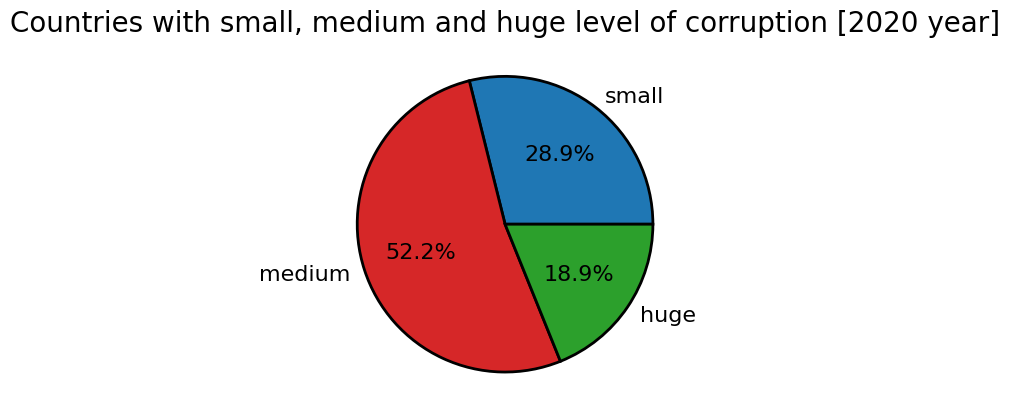

In [39]:
pie_colors = ['tab:blue', 'tab:red', 'tab:green']
plt.pie(years_stat['2020'].values(),labels=years_stat['2020'].keys(),autopct='%1.1f%%',colors=pie_colors, wedgeprops={'edgecolor':'black', 'linewidth':2}, textprops={'fontsize':16})
plt.title('Countries with small, medium and huge level of corruption [2020 year]', size=20)
plt.show()

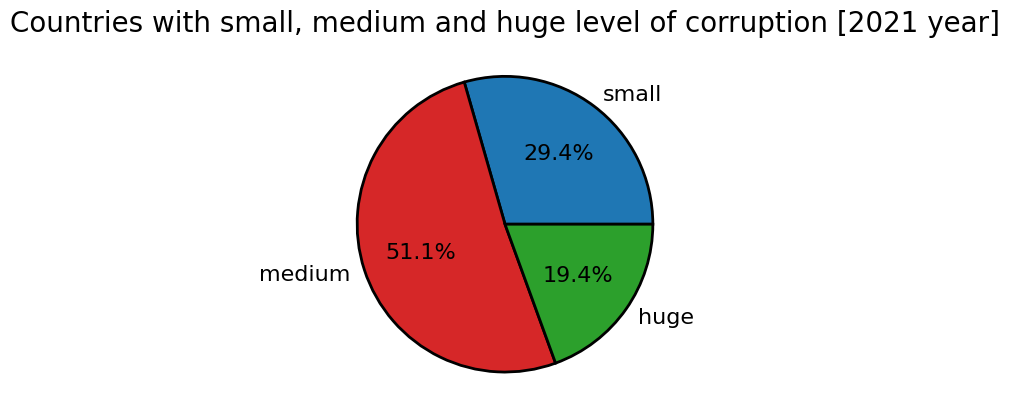

In [40]:
plt.pie(years_stat['2021'].values(),labels=years_stat['2021'].keys(),autopct='%1.1f%%',colors=pie_colors, wedgeprops={'edgecolor':'black', 'linewidth':2}, textprops={'fontsize':16})
plt.title('Countries with small, medium and huge level of corruption [2021 year]', size=20)
plt.show()

### График для коррупции в Китае

In [41]:
values

{'2021': 55,
 '2020': 58,
 '2019': 59,
 '2018': 61,
 '2017': 59,
 '2016': 60,
 '2015': 63,
 '2014': 64,
 '2013': 60,
 '2012': 61}

In [42]:
data = {'Year': list(values.keys()),
        'Value': list(values.values())}
china_df = pd.DataFrame(data)
china_df

,Year,Value
0,2021,55
1,2020,58
2,2019,59
3,2018,61
4,2017,59
5,2016,60
6,2015,63
7,2014,64
8,2013,60
9,2012,61


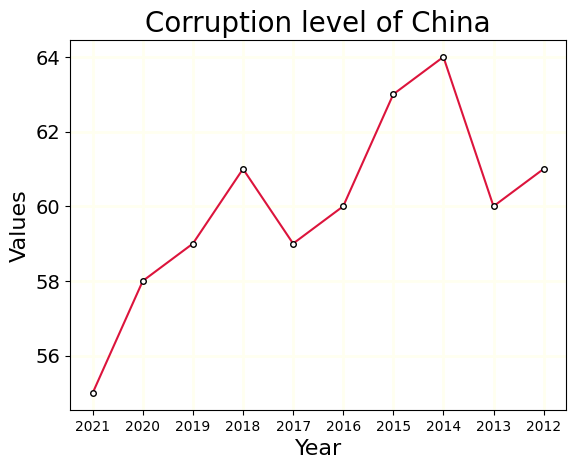

In [43]:
plt.plot(china_df['Year'], china_df['Value'],  color='crimson', marker='o', markersize=4, markerfacecolor='white',markeredgecolor='black')
plt.ylabel('Values', size=16)
plt.xlabel('Year', size=16)
plt.xticks(size=10)
plt.yticks(size=14)
plt.title('Corruption level of China', size=20)
plt.grid(color='ivory', linewidth=2)
plt.show()